# Group project - Political Media

---

Predict the message classes in the column `message` from the file `Political-media-DFE.csv`. Extract text data and include it into your modeling. 

To evaluate your model through cross-validation, set `cv` to the given cross-validation method.

The data stems from https://www.figure-eight.com/wp-content/uploads/2016/03/Political-media-DFE.csv, but is now available on [Kaggle](https://www.kaggle.com/crowdflower/political-social-media-posts).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

In [3]:
df = pd.read_csv('Political-media-DFE.csv', encoding='latin')
df.head(2)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,...,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
0,766192484,False,finalized,1,8/4/15 21:17,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83249E+17,From: Trey Radel (Representative from Florida),NaN,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,766192485,False,finalized,1,8/4/15 21:20,national,1.0,partisan,1.0,attack,...,NaN,NaN,NaN,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11208E+17,From: Mitch McConnell (Senator from Kentucky),NaN,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...


In [4]:
df.drop(columns=['_unit_id', '_golden', '_unit_state', '_last_judgment_at', 'orig__golden', 'audience_gold', 'embed', 'id', 'message_gold'], inplace=True)

In [5]:
df.columns

Index(['_trusted_judgments', 'audience', 'audience:confidence', 'bias',
       'bias:confidence', 'message', 'message:confidence', 'bias_gold',
       'bioid', 'label', 'source', 'text'],
      dtype='object')

In [6]:
df.shape

(5000, 12)

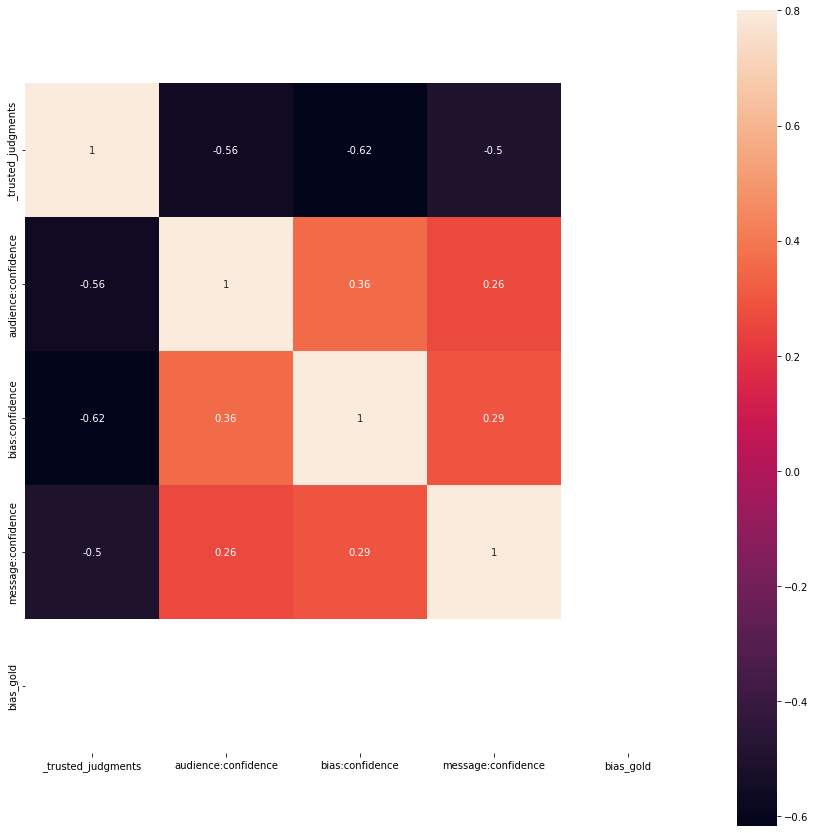

In [7]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
stop = stopwords.words('english')
stop += ['http', 'https', 'rt']

In [10]:
cvec = CountVectorizer(stop_words='english')

In [11]:
cvec.fit(df['text'])

CountVectorizer(stop_words='english')

In [16]:
cvec.get_feature_names_out()

array(['00', '000', '000th', ..., 'ûówhich', 'ûówhile', 'ûówomen'],
      dtype=object)

In [18]:
df2 = pd.DataFrame(cvec.transform(df['text']).toarray(),
                  columns=cvec.get_feature_names_out())
df2

,00,000,000th,0017a43b2370,001a4bcf6878,00am,00amct,00kq8qqlaa,00pm,01,...,ûóto,ûótoday,ûóunifying,ûóurgent,ûóveterans,ûówanting,ûówe,ûówhich,ûówhile,ûówomen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df.text

0       RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1       VIDEO - #Obamacare:  Full of Higher Costs and ...
2       Please join me today in remembering our fallen...
3       RT @SenatorLeahy: 1st step toward Senate debat...
4       .@amazon delivery #drones show need to update ...
                              ...                        
4995    I applaud Governor PerryÛªs recent decision t...
4996    Today, I voted in favor of H.R. 5016 - Financi...
4997    (Taken from posted WOKV interview)   Congressm...
4998    Join me next week for a town hall in Ocala! I'...
4999    Foreign Affairs Committee Hearing on Syria. I ...
Name: text, Length: 5000, dtype: object

#### Use the following cross validation method

In [20]:
df['message'].value_counts(normalize=True).max()

0.2822

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier

In [22]:
X = cvec.transform(df['text'])
y = df['message']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                        stratify=y, test_size=0.2, random_state=1)

In [24]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [25]:
dtreg_one = DecisionTreeClassifier(max_depth=5)

dtreg_one.fit(X_train, y_train)
print("Training Score:", dtreg_one.score(X_train, y_train))
print("Mean cross-validated training score:", cross_val_score(dtreg_one, X_train, y_train, cv=kf).mean())
print("Test Score:", dtreg_one.score(X_test, y_test))

Training Score: 0.31025
Mean cross-validated training score: 0.29525000000000007
Test Score: 0.292


In [26]:
model = DecisionTreeClassifier(random_state=1)

In [27]:
# Grid Search
params = {'max_depth': [1, 2, 3, 4, 5, 6],
          # , 'max_features':[1,2,3,4],
          'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 10, 12, 16, 32, 48, 64],
          'min_samples_leaf': [1, 2, 3, 4]
          # 'min_samples_split':[1,2,3,4]
          }

gs = GridSearchCV(model, param_grid=params, cv=kf, n_jobs=-2)
gs.fit(X_train, y_train)

model = gs.best_estimator_
print(gs.best_estimator_)
print('training: ', gs.score(X_train, y_train))
print('CV training: ', gs.best_score_)
print('test: ', gs.score(X_test, y_test))

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=7, random_state=1)
training:  0.30975
CV training:  0.30175
test:  0.302


In [28]:
log = LogisticRegression()

log.fit(X_train, y_train)
print("Training Score:", log.score(X_train, y_train))
print("Mean cross-validated training score:", cross_val_score(log, X_train, y_train, cv=kf).mean())
print("Test Score:", log.score(X_test, y_test))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Score: 0.99225


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Mean cross-validated training score: 0.35100000000000003
Test Score: 0.354


In [29]:
params2 = {'C': np.logspace(-5, 5, 15),
          'penalty': ['l1', 'l2'],
          'fit_intercept': [True, False]}



gs2 = GridSearchCV(estimator=model,
                  param_grid=params2,
                  cv=kf,
                  scoring='accuracy',
                  return_train_score=True)

gs2 = GridSearchCV(log, param_grid=params2, cv=kf, n_jobs=-2)
gs2.fit(X_train, y_train)

model = gs2.best_estimator_
print(gs2.best_estimator_)
print('training: ', gs2.score(X_train, y_train))
print('CV training: ', gs2.best_score_)
print('test: ', gs2.score(X_test, y_test))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression(C=0.037275937203149416)
training:  0.587
CV training:  0.3895
test:  0.417


In [30]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Training Score:", knn.score(X_train, y_train));
print("Mean cross-validated training score:", cross_val_score(knn, X_train, y_train, cv=kf).mean());
print("Test Score:", knn.score(X_test, y_test));

Training Score: 0.505
Mean cross-validated training score: 0.26250000000000007
Test Score: 0.255


In [ ]:
# use e.g. with appropriate model and feature set, use GridsearchCV for appropriate tuning
# cross_val_score(model, X, y, cv=kf)